# Vamos a realizar un clasificador multiclase
Podemos imaginar que obtenemos cierta información de nuestros clientes: datos históricos, a través de que canal han llegado a trabajar con nosotros, línea de negocio, balances...
Un problema muy interesante sería poder priorizar la atención y recursos gastados en aquellos clientes que nos van a resultar en un mayor beneficio

In [1]:
# Cargamos librerias y clientes
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
clients = pd.read_csv('clients.csv')


In [3]:
print(clients.shape)
clients.head(5)


(59, 6)


,client_label,client_type,feat1,feat2,feat3,feat4
0,1,conservative,156,7.6,7.5,0.67
1,3,minor,160,7.0,7.4,0.81
2,1,conservative,180,8.0,6.8,0.59
3,4,business,116,6.1,8.5,0.71
4,1,conservative,178,7.1,7.8,0.92


In [6]:
print(clients.groupby('client_type').size())


client_type
VIP              5
business        16
conservative    19
minor           19
dtype: int64


/usr/lib/python3/dist-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


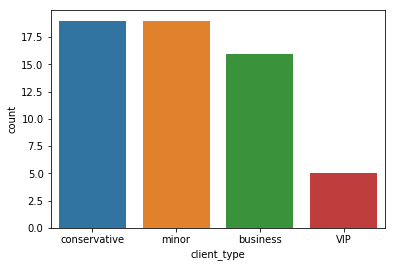

In [8]:
import seaborn as sns
sns.countplot(clients['client_type'],label="Count")
plt.show()

Text(0, 0.5, 'Probability')

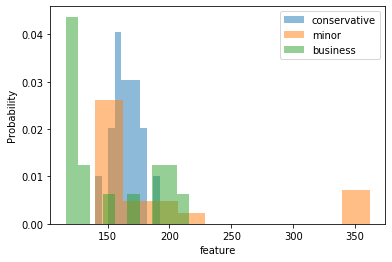

In [11]:
## Revisamos las features
# Dibujamos los histogramas normalizados, transparencias...
plt.hist(clients[clients["client_type"] == "conservative"].feat1, bins=10, label = "conservative", density=True, alpha = 0.5)
plt.hist(clients[clients["client_type"] == "minor"].feat1, bins=10, label = "minor", density=True, alpha = 0.5)
plt.hist(clients[clients["client_type"] == "business"].feat1, bins=10, label = "business", density=True, alpha = 0.5)

plt.legend(loc='upper right')
plt.xlabel("feature")
plt.ylabel("Probability")



In [12]:
y = clients.client_label
X = clients.drop(["client_label", "client_type"], axis=1)

In [14]:
y

0     1
1     3
2     1
3     4
4     1
5     3
6     4
7     3
8     4
9     3
10    3
11    1
12    3
13    4
14    3
15    1
16    4
17    1
18    1
19    3
20    2
21    4
22    1
23    2
24    4
25    3
26    1
27    3
28    4
29    3
30    4
31    4
32    4
33    4
34    2
35    2
36    4
37    1
38    1
39    1
40    3
41    4
42    3
43    3
44    4
45    1
46    1
47    3
48    4
49    2
50    3
51    3
52    1
53    1
54    1
55    3
56    1
57    1
58    3
Name: client_label, dtype: int64

In [9]:
#print(X)

## Dividimos entre train y test

In [30]:
# SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
from collections import Counter
Counter(y_train)

Counter({3: 14, 4: 11, 1: 14, 2: 2})

In [17]:
Counter(y_test)

Counter({2: 3, 1: 5, 3: 5, 4: 5})

In [76]:
# print(X_test)

In [31]:
# NORMALIZACION DE DATOS
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train, )
pd.DataFrame(data = {"predict":clf.predict(X_test), "real": y_test})

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
clf.feature_importances_

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.89


array([0.24721586, 0.20127639, 0.2873325 , 0.26417526])

In [89]:
clf.

array([0.        , 0.34325109, 0.17162554, 0.48512337])

# Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier().fit(X_train, y_train)
pd.DataFrame(data = {"predict":clf.predict(X_test), "real": y_test})

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

clf.feature_importances_

Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.83


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.19133927, 0.26132334, 0.18707252, 0.36026486])

## XGboost

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier().fit(X_train, y_train)
pd.DataFrame(data = {"predict":clf.predict(X_test), "real": y_test})

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

print(clf.feature_importances_)

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 1.00
[0.14397429 0.15171896 0.21752015 0.4867866 ]


## SVM

In [51]:
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# Probar diferentes kernels
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))


Accuracy of SVM classifier on training set: 0.39
Accuracy of SVM classifier on test set: 0.22


/usr/local/lib/python3.7/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
